In [3]:
import torch
from PIL.Image import Image
from torch import Tensor

from OCR import IO
from OCR.architecture.CharacterRecognizer import CharacterRecognizer

def load_and_transform(img_path, model):
    w, h = model.input_size
    new_size = (h, w)

    img = IO.load_image(img_path).convert('RGB')
    resized = img.resize(new_size)
    return to_torch_format(resized, model.dtype), resized

def to_torch_format(img: Image, dtype: torch.dtype) -> Tensor:
    return torch.tensor(img.getdata(), dtype=dtype).reshape(*img.size, -1).T / 255


model = CharacterRecognizer.load_from_checkpoint('~/models/LPR-OCR/golden-lr/lightning_logs/version_2/checkpoints/last.ckpt')

In [4]:
images = IO.get_image_paths('../rl-examples', '*.png') + IO.get_image_paths('../rl-examples', '*.jpg')
image_tensors = [load_and_transform(img, model)[0] for img in images]
stacked_images = torch.stack(image_tensors)

predictions = model.predict(stacked_images)

resized_images = [load_and_transform(img, model)[1] for img in images]

['闽', '晋', 'F', 'L', '\\', 'Y', '3']


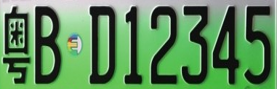

In [14]:
print(predictions[0])
resized_images[0]

['2', '宁', '°', 'S', '°', 'F', '°', '-', 'A']


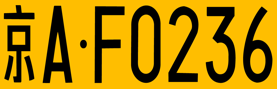

In [15]:
print(predictions[1])
resized_images[1]

['鲁', '°', 'L', 'J', '4', '°']


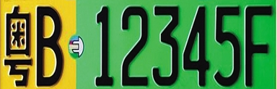

In [16]:
print(predictions[2])
resized_images[2]

['J', '宁', '°', '云', '4', 'F', 'L', '°', 'A']


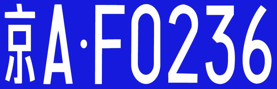

In [17]:
print(predictions[3])
resized_images[3]